In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

## First reformat groups to simple repeat - Alu - satellite

In [2]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/HG01890_final.txt') as f:
    Lines = f.readlines()
    
    AluFlag = 0
    aluEnd =0
    
    AluCasetteDict = {}
    group = 0
    AluCasetteDict[str(group)]=[]

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
            
        if AluFlag == 0:
            
            if goodLine.split(" ")[11] == 'SINE/Alu':
                aluEnd=int(goodLine.split(" ")[7].strip())
                AluCasetteDict[str(group)].append(goodLine)
                AluFlag+=1
                
            else:
                continue
                
        else:
            
            
            if int(goodLine.split(" ")[6])-int(aluEnd) < 4000:
                
                AluCasetteDict[str(group)].append(goodLine)

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())

                else:
                    continue
                    
            else:
                
                group+=1
                AluCasetteDict[str(group)]=[]

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())
                    AluCasetteDict[str(group)].append(goodLine)

                else:
                    continue
                    

            
    
    
    f.close()

100%|█████████████████████████████████| 16757/16757 [00:00<00:00, 301270.31it/s]


In [3]:
goodKeys = []
for x in AluCasetteDict.keys():
    if len(AluCasetteDict[x])>0:
        goodKeys.append(x)
        

goodAluGroupDict={}
tallyCount=0
for x in AluCasetteDict.keys():
    if x in goodKeys:
        goodAluGroupDict[tallyCount] = AluCasetteDict[x]
        tallyCount+=1
        continue
    else:
        continue

In [4]:
repeatBlocks = goodAluGroupDict.copy()

In [5]:
firstAlus = [repeatBlocks[x][0] for x in list(repeatBlocks.keys())[:-3]]
print(len(firstAlus))

18


In [6]:
lastAlus = []
for key in list(repeatBlocks.keys())[:-3]:
    lastAlu = 'temp'
    for repeat in repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            lastAlu=repeat
        else:
            continue
    lastAlus.append(lastAlu)
print(len(lastAlus))

18


In [7]:
LineNumbers = {'First':[], 'Last':[]}
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/HG01890_final.txt') as f:
    Lines = f.readlines()
    
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        if goodLine.split(" ")[11] == 'SINE/Alu':
            if goodLine in firstAlus:
                LineNumbers['First'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            elif goodLine in lastAlus:
                LineNumbers['Last'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            else:
                lineNum+=1
                
        else:
            lineNum+=1

100%|█████████████████████████████████| 16757/16757 [00:00<00:00, 217694.43it/s]


In [8]:
new_repeatBlocks = {x:[] for x in list(repeatBlocks.keys())[:-3]}

In [9]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/HG01890_final.txt') as f:
    Lines = f.readlines()
    

    groups = list(new_repeatBlocks.keys())
    groupNum = 0
    
    for group in groups:
        
        lineNum = 0
        for line in tqdm(Lines): 

            goodLine = ' '.join(line.split())

            if int(lineNum) == (int(LineNumbers['First'][groupNum].split(" ")[-1].strip())-1) and (int(LineNumbers['First'][groupNum].split(" ")[6].strip())-int(goodLine.split(" ")[7].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)   
                lineNum+=1
            elif int(lineNum) >= int(LineNumbers['First'][groupNum].split(" ")[-1].strip()) and int(lineNum) <= int(LineNumbers['Last'][groupNum].split(" ")[-1].strip()):
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            elif int(lineNum) == (int(LineNumbers['Last'][groupNum].split(" ")[-1].strip())+1) and (int(goodLine.split(" ")[6].strip()) - int(LineNumbers['Last'][groupNum].split(" ")[7].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            else:
                lineNum+=1
                                                                                                  
        groupNum+=1

100%|█████████████████████████████████| 16757/16757 [00:00<00:00, 271290.15it/s]


In [10]:
for x in list(repeatBlocks.keys())[-3:]:
    new_repeatBlocks[x] = repeatBlocks[x] 

In [11]:
goodAluGroupDict = new_repeatBlocks.copy()

In [12]:
goodAluGroupDict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [13]:
RepeatBlockLengths = []
for key in new_repeatBlocks.keys():
    RepeatBlockLengths.append((int(new_repeatBlocks[key][-1].split(" ")[7].strip())-int(new_repeatBlocks[key][0].split(" ")[6].strip()))+1)

In [14]:
#exportListDF = pd.DataFrame(data=RepeatBlockLengths, columns=['RepeatBlockLength'])
#exportListDF.to_csv("/home/mark/Desktop/chromosome_y/repeatBlockFiles/ListCSVs/HG01890_RepeatBlock.csv")

In [15]:
AllAlus = 0
for key in new_repeatBlocks.keys():
    totalAlus = 0
    for repeat in new_repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            totalAlus+=1
            AllAlus+=1
        else:
            continue
            
    print("Repeat Block: "+str(key))
    print("Total Alus: "+str(totalAlus))
print("All Alus: "+str(AllAlus))

Repeat Block: 0
Total Alus: 13
Repeat Block: 1
Total Alus: 38
Repeat Block: 2
Total Alus: 9
Repeat Block: 3
Total Alus: 96
Repeat Block: 4
Total Alus: 113
Repeat Block: 5
Total Alus: 26
Repeat Block: 6
Total Alus: 45
Repeat Block: 7
Total Alus: 101
Repeat Block: 8
Total Alus: 87
Repeat Block: 9
Total Alus: 270
Repeat Block: 10
Total Alus: 163
Repeat Block: 11
Total Alus: 824
Repeat Block: 12
Total Alus: 83
Repeat Block: 13
Total Alus: 684
Repeat Block: 14
Total Alus: 67
Repeat Block: 15
Total Alus: 44
Repeat Block: 16
Total Alus: 11
Repeat Block: 17
Total Alus: 10
Repeat Block: 18
Total Alus: 9
Repeat Block: 19
Total Alus: 23
Repeat Block: 20
Total Alus: 31
All Alus: 2747


In [16]:
#Export Blocks (Palmetto RegionBlocks)
#for key in new_repeatBlocks.keys():
#    with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/RepeatMaskSections/HG01890/HG01890_RepeatBlock_"+str(key)+'.txt', 'a+') as file:
#        for repeat in new_repeatBlocks[key]:
#            file.write(repeat+"\n")
#    file.close()

In [17]:
#This code makes one file with the coordinates of each Alu in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Alus/HG01890/HG01890_RepeatBlock_Alus.txt", 'a+') as file:
    for key in new_repeatBlocks.keys():
        for repeat in new_repeatBlocks[key]:
            if 'SINE/Alu' in repeat:
                if str(repeat.split(" ")[9]) == 'True':
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")
                    else:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")
                else:
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

                    else:  
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

## Repeat Distribution

In [16]:
endBlockList = [str(x) for x in list(new_repeatBlocks.keys())[-3:]]

In [17]:
####################### WORKING ONE ###############################################################################

In [18]:
GroupSubBlock = {}

for key in goodAluGroupDict.keys():
    
    temporaryGroup = goodAluGroupDict[key].copy()

    
    #Initialize
    interGroup = []
    tempList = []
    first = 0
    second = 0
    switch = 'temp'
    flag=0
    check=0
    lastCheck=0

    groupCount = 0
    
    #Loop through Block
    for repeat in temporaryGroup:
        
        if repeat == temporaryGroup[-1]:
            tempList.append(repeat)
            interGroup.append(tempList)
            
        else:

            if switch == str(repeat.split(" ")[11].strip()) and lastCheck==1:
                tempList.append(repeat)
                switch = str(repeat.split(" ")[11].strip())
                lastCheck=1
                #continue

            elif lastCheck==1 and switch != str(repeat.split(" ")[11].strip()) and str(repeat.split(" ")[11].strip()) != 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                switch = str(repeat.split(" ")[11].strip())
                first=1
                lastCheck=0
                second=0
                check=0
                flag=0

            elif lastCheck==1 and str(repeat.split(" ")[11].strip()) == 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                lastCheck=0
                first=1
                second=0
                check=0
                flag=1


            ################# If there is no repeats in the group yet / New Group #############################

            else:

                if first==0:

                    if 'SINE/Alu' in repeat:
                        tempList = []
                        tempList.append(repeat)
                        first=1
                        second=0
                        flag=1

                    else:
                        tempList = []
                        tempList.append(repeat)
                        switch= str(repeat.split(" ")[11].strip())
                        first=1
                        second=0
                        flag=0
                        check=0

                ######################### If there is one repeat already ################################     

                elif first == 1 and second == 0:

                    if flag == 1:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)

                            tempList = []
                            tempList.append(repeat)
                            second = 0
                            flag=1
                            first=1

                        else:

                            check=1
                            first=1
                            second=1
                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[11].strip()) 


                    else:

                        if 'SINE/Alu' in repeat:
                            tempList.append(repeat)
                            first=1
                            second = 1
                            check=0

                        else:

                            if str(repeat.split(" ")[11].strip()) == switch:
                                tempList.append(repeat)
                                second=0
                                first=1
                                flag=0

                            else:
                                tempList = []
                                tempList.append(repeat)
                                switch= str(repeat.split(" ")[11].strip())
                                first=1
                                second=0
                                flag=0
                                check=0
                                #print("ERROR 1")
                                #print(key)
                                #print(tempList)
                                #print(repeat)


                elif first == 1 and second == 1:

                    if check == 1:

                        #If the third is the same append
                        if switch == str(repeat.split(" ")[11].strip()):
                            tempList.append(repeat)
                            first=1
                            second=0
                            flag=1
                            check=0

                        else:

                            #Start a new group
                            if 'SINE/Alu' in repeat:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                flag=1
                                check=0
                                first=1
                                second=0

                            else:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                switch = str(repeat.split(" ")[11].strip())
                                flag=0
                                first=1
                                check=0
                                second=0

                    else:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)
                            tempList = []
                            tempList.append(repeat)
                            flag=1
                            first=1
                            check=0
                            second=0

                        else:

                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[11].strip())
                            lastCheck=1

    
    GroupSubBlock[key]= []
    for listGroup in interGroup:
        GroupSubBlock[key].append(listGroup)

In [19]:
OrientationDict = {'True':'C', 'False':'+'}
repeatBlock_distList = []

for key in GroupSubBlock.keys():

    for group in GroupSubBlock[key]:
        #print(group)
        
        groupStart = int(group[0].split(" ")[6].strip())
        groupEnd = int(group[-1].split(" ")[7].strip())
        alu = 'temp'
        
        for repeat in group:
            if 'SINE/Alu' in repeat :
                alu = OrientationDict[str(repeat.split(" ")[9].strip())]+"_"+str(repeat.split(" ")[10].strip())+"_"+str(repeat.split(" ")[6].strip())+"-"+str(repeat.split(" ")[7].strip())
            else:
                continue
                
        repeatBlock_distList.append([int(key), alu, ((groupEnd-groupStart)+1), group])

In [20]:
import json
#with open('/home/mark/Desktop/chromosome_y/json_dict/HG01890_cluster.json', 'w') as fp:
#    json.dump(GroupSubBlock, fp)

In [20]:
rb_df = pd.DataFrame(data=repeatBlock_distList, columns=['RepeatBlock','Alu','Lengths','Group'])

In [21]:
#Make sure not to keep all rows as some are "graveyard" blocks (last 3 Repeat Blocks)
rb_df

,RepeatBlock,Alu,Lengths,Group
0,0,C_AluY_29825231-29825519,2216,[45510 373 24.0 3.7 3.7 chrY.01-24.01.PAR1-PAR...
1,0,C_AluY_29827646-29827937,2411,[45513 407 24.3 3.9 3.8 chrY.01-24.01.PAR1-PAR...
2,0,C_AluY_29830064-29830355,2411,[45516 405 24.4 3.9 3.8 chrY.01-24.01.PAR1-PAR...
3,0,C_AluY_29832473-29832761,2399,[45519 363 27.6 2.7 4.0 chrY.01-24.01.PAR1-PAR...
4,0,C_AluY_29834883-29835171,2403,[45522 410 24.2 4.6 3.0 chrY.01-24.01.PAR1-PAR...
...,...,...,...,...
2742,20,+_AluSx_46159487-46159815,507,[60051 2110 13.0 0.7 0.0 chrY.01-24.01.PAR1-PA...
2743,20,+_AluJb_46160943-46161093,1012,[60053 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR2...
2744,20,+_AluSp_46161094-46161391,298,[60055 2100 12.8 0.7 0.3 chrY.01-24.01.PAR1-PA...
2745,20,+_AluJb_46161392-46161551,772,[60056 1578 19.5 0.0 6.5 chrY.01-24.01.PAR1-PA...


In [23]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/HG01890_rbDF.csv")

In [24]:
#This code makes one file with the coordinates of each DYZ in each repeatblock
with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/DYZ/HG01890/HG01890_RepeatBlock_DYZs.txt", 'a+') as file:
    for row in rb_df.index:
        if 'C_' in str(rb_df.at[row,'Alu']):
            
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")

        else:
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

In [22]:
rb_df['Color'] = 'temp'
rb_df['Block_Size'] = 'temp'

for entry in rb_df.index:
    
    if rb_df.at[entry,'RepeatBlock'] > 17:
        
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'
        
    else:
    
    
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = '#073B4C'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = '#118AB2'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = '#06D6A0'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = '#FFD166'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'


In [23]:
import collections
for x,y in collections.Counter(rb_df[rb_df['RepeatBlock']<18]['Color']).items():
    print(x)
    print(int(y)/len(rb_df[rb_df['RepeatBlock']<18]['Color']))

#06D6A0
0.9795081967213115
#118AB2
0.012667660208643815
#FFD166
0.0011177347242921013
#073B4C
0.0067064083457526085


## Look at satellites do quick stats

In [24]:
tmpSatellitesList=[]
tmpSatellitesLength=[]

import ast
for x in rb_df[rb_df['RepeatBlock']<18]['Group']:
    for repeat in x:
        if 'Satellite' in repeat:
            tmpSatellitesList.append(repeat.split(" ")[10].strip())
            tmpSatellitesLength.append((int(repeat.split(" ")[7].strip())-int(repeat.split(" ")[6].strip()))+1)

In [25]:
import collections
print(collections.Counter(tmpSatellitesList))
print("\n")
print(collections.Counter(tmpSatellitesLength))

Counter({'HSATI': 2679})


Counter({568: 2474, 567: 92, 564: 38, 569: 24, 134: 12, 563: 7, 439: 7, 562: 7, 437: 4, 566: 4, 456: 4, 438: 2, 546: 1, 141: 1, 555: 1, 565: 1})


In [29]:
#################################################################################

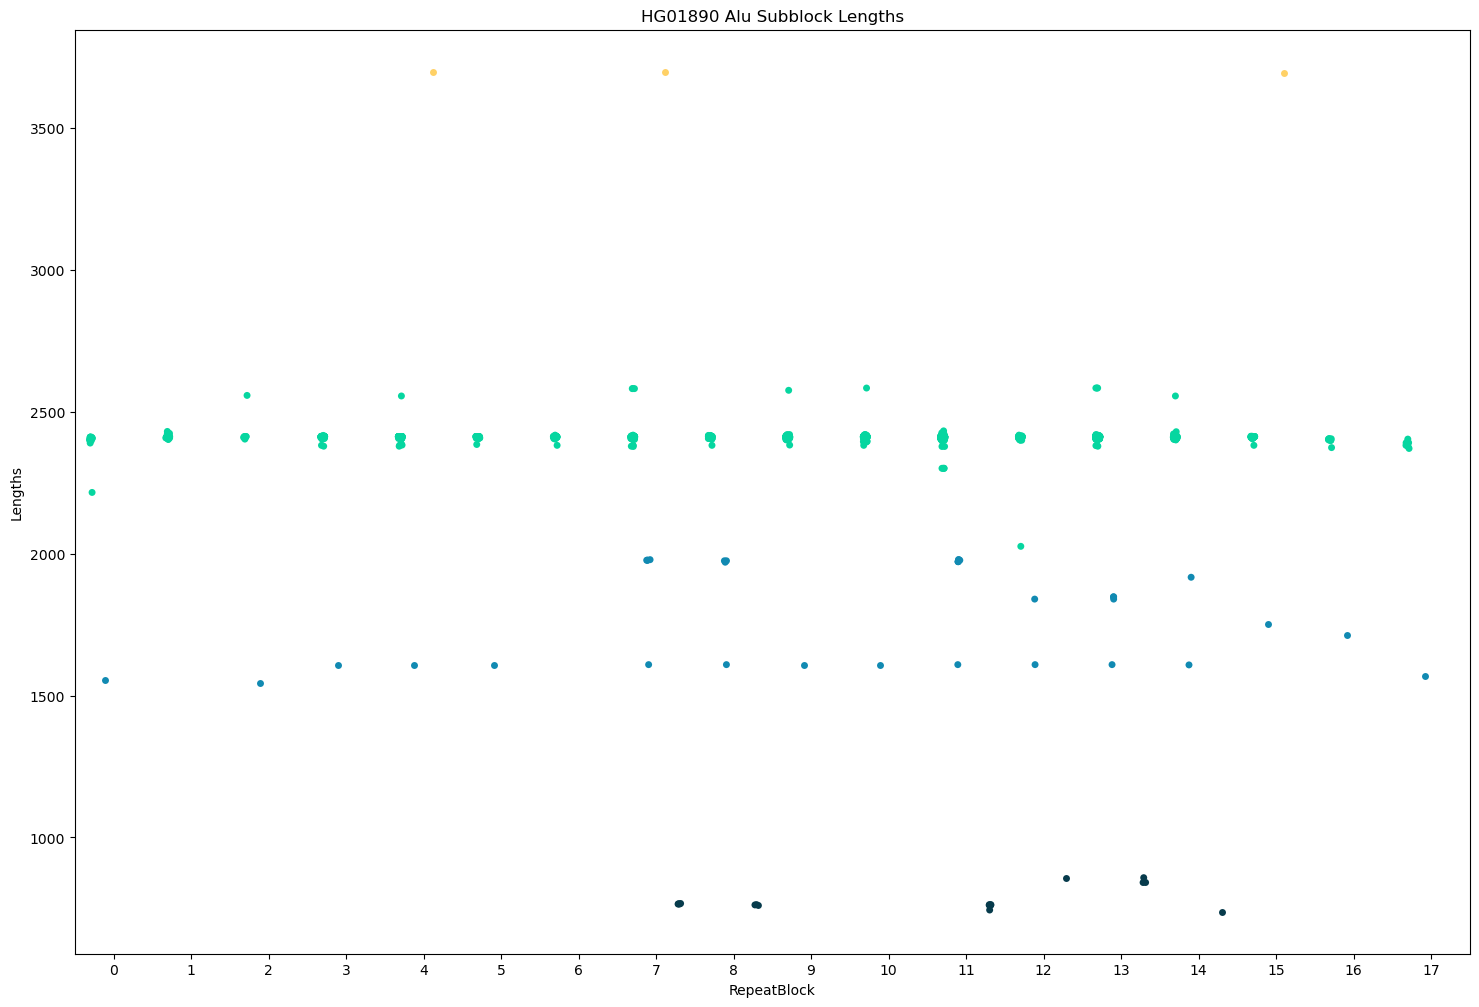

In [39]:
from matplotlib import rcParams
palette = {x:x for x in set(rb_df['Color'])}

plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HG01890 Alu Subblock Lengths")
ax=sns.stripplot(x="RepeatBlock", y="Lengths", data=rb_df[rb_df['RepeatBlock']<18], hue='Color', palette=palette, dodge=True)
ax.get_legend().remove()
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_AluSubBlock_dots.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [26]:
temprbDF3 = rb_df[rb_df['RepeatBlock']<18].reset_index().set_index("RepeatBlock").copy()
heatDF = pd.DataFrame(index=set(temprbDF3.index), columns=set(temprbDF3['Color'])).fillna(0)
heatDF.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for key,value in dict(collections.Counter(temprbDF3.loc[block]['Color'])).items():
        #print(key)
        #print(value)
        heatDF.at[block,key]+= int(value)
heatDF.head()

,#118AB2,#073B4C,#06D6A0,#FFD166
RepeatBlock,,,,
0,1,0,12,0
1,0,0,38,0
2,1,0,8,0
3,1,0,95,0
4,1,0,111,1


In [27]:
heatDF2 = heatDF.div(heatDF.sum(axis=1), axis=0).copy()            
heatDF2.head()

,#118AB2,#073B4C,#06D6A0,#FFD166
RepeatBlock,,,,
0,0.076923,0.0,0.923077,0.00000
1,0.000000,0.0,1.000000,0.00000
2,0.111111,0.0,0.888889,0.00000
3,0.010417,0.0,0.989583,0.00000
4,0.008850,0.0,0.982301,0.00885


In [28]:
heatDF_mInfo = pd.DataFrame(index=set(temprbDF3.index), columns=[str(o)+"_"+str(x)+"_"+str(y) for y in set(temprbDF3['Block_Size']) for x in set(temprbDF3['Color']) for o in ["C","+"]]).fillna(0)
heatDF_mInfo.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for alu in temprbDF3.loc[block].reset_index().index:
        #print(alu)
        heatDF_mInfo.at[block,str(temprbDF3.loc[block].reset_index().at[alu,'Alu'].split("_")[0].strip())+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Color'])+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Block_Size'])]+= 1
heatDF_mInfo.head()

,C_#118AB2_1000-1999,+_#118AB2_1000-1999,C_#073B4C_1000-1999,+_#073B4C_1000-1999,C_#06D6A0_1000-1999,+_#06D6A0_1000-1999,C_#FFD166_1000-1999,+_#FFD166_1000-1999,C_#118AB2_3000-3999,+_#118AB2_3000-3999,...,C_#FFD166_2000-2999,+_#FFD166_2000-2999,C_#118AB2_<999,+_#118AB2_<999,C_#073B4C_<999,+_#073B4C_<999,C_#06D6A0_<999,+_#06D6A0_<999,C_#FFD166_<999,+_#FFD166_<999
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
################################### BRAY-CURTIS DISTANCE ######################################

In [30]:
heatDF_mInfo2 = heatDF_mInfo.div(heatDF_mInfo.sum(axis=1), axis=0).copy()            
heatDF_mInfo2.head()
from scipy.spatial import distance
heatDF_mInfo3 = pd.DataFrame(index=heatDF_mInfo2.sort_index().index, columns=heatDF_mInfo2.sort_index().index).fillna(0.0)
for index in heatDF_mInfo3.index:
    for column in heatDF_mInfo3.columns:
        heatDF_mInfo3.at[index,column]= 1-float(distance.braycurtis(list(heatDF_mInfo.loc[index]), list(heatDF_mInfo.loc[column])))
heatDF_mInfo3.head()

RepeatBlock,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
RepeatBlock,,,,,,,,,,,,,,,,,,
0,1.000000,0.313725,0.727273,0.146789,0.126984,0.410256,0.275862,0.140351,0.160000,0.056537,0.090909,0.019116,0.187500,0.025825,0.325000,0.385965,0.666667,0.695652
1,0.313725,1.000000,0.340426,0.567164,0.503311,0.781250,0.915663,0.546763,0.608000,0.246753,0.378109,0.088167,0.628099,0.105263,0.457143,0.926829,0.408163,0.375000
2,0.727273,0.340426,1.000000,0.171429,0.147541,0.514286,0.296296,0.163636,0.187500,0.064516,0.104651,0.021609,0.195652,0.025974,0.210526,0.301887,0.900000,0.947368
3,0.146789,0.567164,0.171429,1.000000,0.918660,0.426230,0.638298,0.934010,0.885246,0.524590,0.741313,0.208696,0.905028,0.246154,0.294479,0.571429,0.205607,0.188679
4,0.126984,0.503311,0.147541,0.918660,1.000000,0.374101,0.569620,0.869159,0.810000,0.584856,0.811594,0.239061,0.826531,0.281054,0.266667,0.509554,0.177419,0.162602


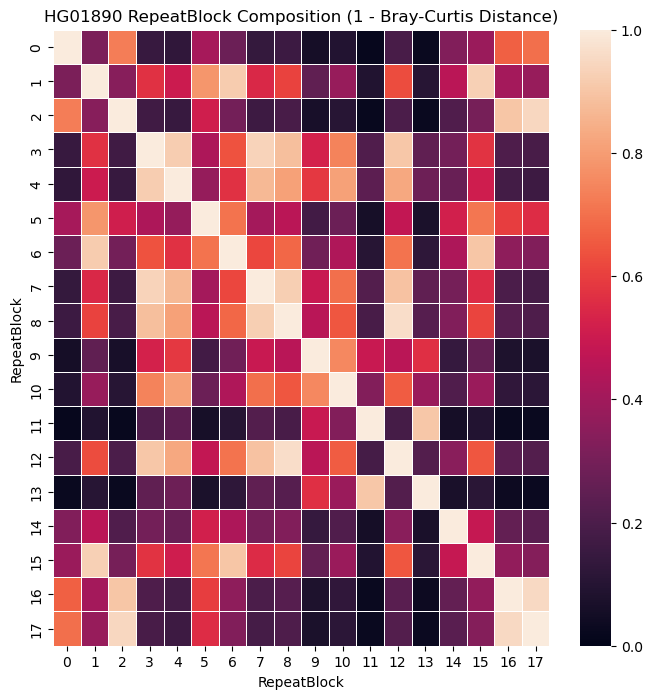

In [31]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,8
sns.heatmap(data=heatDF_mInfo3.sort_index(), linewidths=.7, annot=False, vmin=0)
plt.title("HG01890 RepeatBlock Composition (1 - Bray-Curtis Distance)")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_BrayCurtis_Heatmap_0", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
brayc = heatDF_mInfo3.sort_index().copy()
for rb in brayc.index:
    
    topHit=0.0
    bestBlock = 0
    flag=0
    
    for block in brayc.loc[rb]:
        
        if float(block) != 1.0 and float(block) >= topHit:
            
            topHit=float(block)
            bestBlock = list(brayc.loc[rb].index)[flag]
            
            flag+=1
            
        else:
            flag+=1

    print("Repeat Block: "+str(rb))
    print("Highest Correlated Block: "+str(bestBlock))
    print("1 - (Bray-Curtis Distance): "+str(topHit))
    print("\n")

Repeat Block: 0
Highest Correlated Block: 2
1 - (Bray-Curtis Distance): 0.7272727272727273


Repeat Block: 1
Highest Correlated Block: 15
1 - (Bray-Curtis Distance): 0.926829268292683


Repeat Block: 2
Highest Correlated Block: 17
1 - (Bray-Curtis Distance): 0.9473684210526316


Repeat Block: 3
Highest Correlated Block: 7
1 - (Bray-Curtis Distance): 0.934010152284264


Repeat Block: 4
Highest Correlated Block: 3
1 - (Bray-Curtis Distance): 0.9186602870813397


Repeat Block: 5
Highest Correlated Block: 1
1 - (Bray-Curtis Distance): 0.78125


Repeat Block: 6
Highest Correlated Block: 1
1 - (Bray-Curtis Distance): 0.9156626506024097


Repeat Block: 7
Highest Correlated Block: 3
1 - (Bray-Curtis Distance): 0.934010152284264


Repeat Block: 8
Highest Correlated Block: 12
1 - (Bray-Curtis Distance): 0.9647058823529412


Repeat Block: 9
Highest Correlated Block: 10
1 - (Bray-Curtis Distance): 0.7528868360277137


Repeat Block: 10
Highest Correlated Block: 4
1 - (Bray-Curtis Distance): 0.81159

In [33]:
################################### VISUALIZE TREE ####################################################

In [34]:
#This code finds the total space between repeat blocks, 0 has 0 since there the space before it starts is not counted
repeatBlockList = list(goodAluGroupDict.keys())
print(repeatBlockList)
BlockListDistance = {x:0 for x in repeatBlockList}
start = 0
for block in repeatBlockList:
    if block == 0:
        continue
    else:
        BlockListDistance[block] = int(goodAluGroupDict[block][0].split(" ")[6].strip()) - int(goodAluGroupDict[repeatBlockList[start]][-1].split(" ")[7].strip()) 
        start+=1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [35]:
#This code prepares the Dataframe to give basic overview of region
for row in rb_df.index:
    if rb_df.at[row,'RepeatBlock']>17:
        rb_df.at[row,'Color']='black'
    else:
        if 'C_' in str(rb_df.at[row,'Alu']):
            rb_df.at[row,'Color']='red'
        else:
            rb_df.at[row,'Color']='blue'

In [50]:
import turtle

In [51]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG01890 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(set(rb_df['RepeatBlock'])):
    
    totalAlus = len(rb_df[rb_df['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['RepeatBlock']==key].copy() 
    for item in tempDF.index:
        
        if 'C_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 21/21 [05:20<00:00, 15.28s/it]


In [52]:
from PIL import Image

In [53]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [54]:
ts = turtle.getscreen()
#save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_YqHeterochromatin")

In [55]:
turtle.bye()

## Look at Sub Blocks

In [36]:
tempHolderList = []
for x,y in collections.Counter(temprbDF3['Lengths']).items():
    for i in range(0,y):
        tempHolderList.append(x)
    
tempDF = pd.DataFrame(data=tempHolderList, columns=['Length'])
tempDF.head()

,Length
0,2216
1,2411
2,2411
3,2411
4,2411


In [38]:
goodAlus = []
tempDF_size = temprbDF3[(temprbDF3['Lengths']>2405) & (temprbDF3['Lengths']< 2415)].copy()

In [39]:
len(tempDF_size)/len(temprbDF3)

0.874441132637854

In [40]:
for x, y in collections.Counter(tempDF_size['Lengths']).items():
    print("Length: "+str(x)+"\tTotal: "+str(y)+"\tPercentage: "+str(y/len(tempDF_size['Lengths'])))

Length: 2411	Total: 282	Percentage: 0.12015338730293992
Length: 2408	Total: 101	Percentage: 0.043033659991478485
Length: 2406	Total: 166	Percentage: 0.07072858968896463
Length: 2413	Total: 1116	Percentage: 0.4755006391137622
Length: 2410	Total: 142	Percentage: 0.060502769492969746
Length: 2412	Total: 372	Percentage: 0.15850021303792075
Length: 2409	Total: 99	Percentage: 0.04218150830847891
Length: 2414	Total: 34	Percentage: 0.014486578610992756
Length: 2407	Total: 35	Percentage: 0.014912654452492544


In [45]:
selectionDF = tempDF_size[tempDF_size['Lengths']==2413].reset_index().copy()
selectionDF

,RepeatBlock,index,Alu,Lengths,Group,Color,Block_Size
0,1,15,C_AluY_30209713-30210004,2413,[45756 418 24.4 3.7 3.7 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1,1,17,C_AluY_30214543-30214834,2413,[45762 423 23.8 4.0 3.6 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
2,1,20,C_AluY_30221793-30222084,2413,[45771 422 24.2 3.7 3.7 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
3,1,21,C_AluY_30224213-30224504,2413,[45774 419 24.5 3.9 3.4 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
4,1,23,C_AluY_30229048-30229339,2413,[45780 418 24.4 3.7 3.7 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
...,...,...,...,...,...,...,...
1111,15,2649,C_AluY_45106268-45106559,2413,[59016 418 24.0 3.8 3.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1112,15,2650,C_AluY_45108688-45108979,2413,[59019 416 24.1 3.8 3.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1113,15,2652,C_AluY_45113527-45113818,2413,[59025 414 24.2 3.8 3.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1114,15,2654,C_AluY_45118365-45118656,2413,[59031 423 23.9 3.8 3.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999


In [46]:
goodRows=[]
for row in selectionDF.index:
    if "+_" in str(selectionDF.at[row,'Alu']):
        continue
    else:
        goodRows.append(row)
good_size_DF = selectionDF.loc[goodRows].copy()

In [52]:
#This percentage is calculated by hand for grabbing top 500 
shuffledDF = good_size_DF.sample(frac=0.45).copy()

In [53]:
shuffledDF

,RepeatBlock,index,Alu,Lengths,Group,Color,Block_Size
890,13,2178,C_AluY_42539741-42540032,2413,[56914 378 19.7 8.9 2.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
392,11,1044,C_AluY_39048575-39048866,2413,[52863 384 19.4 8.7 3.1 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
478,11,1252,C_AluY_39551284-39551575,2413,[53543 419 24.2 3.7 3.7 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
901,13,2206,C_AluY_42607425-42607716,2413,[57000 416 24.2 3.5 4.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
210,9,599,C_AluY_37250995-37251286,2413,[50904 383 19.1 8.9 3.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
...,...,...,...,...,...,...,...
530,11,1358,C_AluY_39803205-39803496,2413,[53869 406 23.6 3.9 3.7 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
602,11,1586,C_AluY_40348215-40348506,2413,[54618 377 19.5 8.9 3.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
886,13,2156,C_AluY_42486376-42486667,2413,[56844 420 23.8 3.4 4.3 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
585,11,1549,C_AluY_40258719-40259010,2413,[54507 415 24.4 3.7 3.7 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999


In [54]:
#with open("/home/mark/Desktop/chromosome_y/HG01890_SmallGenome_2413_DYZNames.txt", "a+") as file:
#    for row in shuffledDF.index:
#        Start = int(shuffledDF.at[row,'Group'][0].split(" ")[6].strip())
#        End = int(shuffledDF.at[row,'Group'][-1].split(" ")[7].strip())
#        alu = str(shuffledDF.at[row,'Group'][0].split(" ")[5].strip())
#        file.write(str(alu)+":"+str(Start)+"-"+str(End)+"\n")
#    file.close()